In [1]:
from tensorflow.python.framework.random_seed import set_random_seed

In [2]:

from numpy.random import seed
seed(123)

from tensorflow.python.framework.random_seed import set_random_seed
set_random_seed(123)


import numpy as np
import pandas as pd

import imageio

import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.listdir("/Users/nouf/Desktop/archive"))
from sklearn.model_selection import train_test_split


['.DS_Store', 'dataA', 'dataB', 'dataE', 'dataD', 'dataC']


In [3]:
image_path = '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/'
mask_path = '/Users/nouf/Desktop/archive/dataA/dataA/CameraSeg/'
image_list = os.listdir(image_path)
mask_list = os.listdir(mask_path)
image_list = [image_path+i for i in image_list]
mask_list = [mask_path+i for i in mask_list]

Text(0.5, 1.0, 'Segmentation')

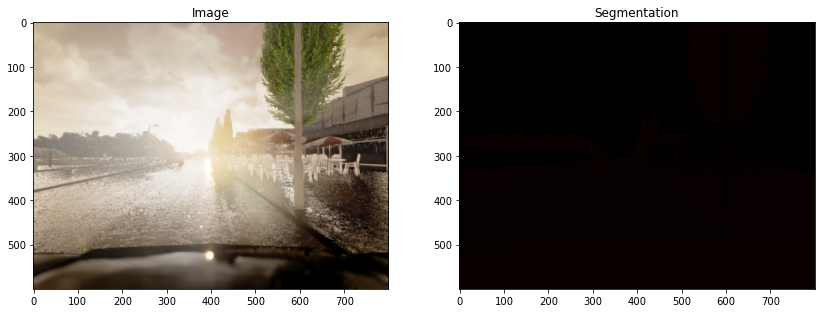

In [4]:
N = 0
img = imageio.imread(image_list[N])
mask = imageio.imread(mask_list[N])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask, cmap='Paired')
arr[1].set_title('Segmentation')

Text(0.5, 1.0, 'Segmentation2')

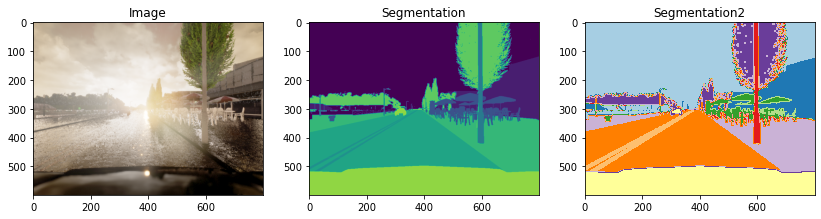

In [5]:
N = 0
img = imageio.imread(image_list[N])
mask = imageio.imread(mask_list[N])
mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(img.shape[0], img.shape[1])

fig, arr = plt.subplots(1, 3, figsize=(14, 10))

arr[0].imshow(img)
arr[0].set_title('Image')

arr[1].imshow(mask)
arr[1].set_title('Segmentation')

arr[2].imshow(mask, cmap='Paired')
arr[2].set_title('Segmentation2')

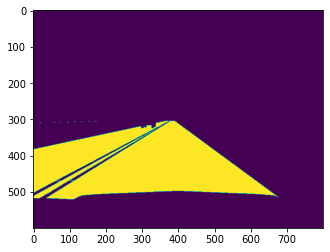

In [6]:
road = np.zeros((600, 800))
road[np.where(mask==7)[0], np.where(mask==7)[1]]=1
plt.imshow(road)

In [7]:
from tqdm import tqdm

In [8]:
height, width = 600, 800
images = np.zeros((len(image_list), height, width, 3), dtype=np.int16)
masks = np.zeros((len(image_list), height, width, 1), dtype=np.int8)

for n in tqdm(range(len(image_list))):
    img = imageio.imread(image_list[n])
    
    mask = imageio.imread(mask_list[n])
    mask_road = np.zeros((600, 800, 1), dtype=np.int8)
    mask_road[np.where(mask==7)[0], np.where(mask==7)[1]]=1
    
    images[n] = img
    masks[n] = mask_road

100%|██████████| 1000/1000 [01:43<00:00,  9.67it/s]


# Split

In [9]:
np.random.seed(123)
shuffle_ids = np.array([i for i in range(len(masks))])
np.random.shuffle(shuffle_ids)
train_ids = shuffle_ids[:int(len(masks)*0.8)]
val_ids = shuffle_ids[int(len(masks)*0.8):int(len(masks)*0.8+100)]
test_ids = shuffle_ids[int(len(masks)*0.8+100):]

In [10]:
train_images, train_masks = images[train_ids], masks[train_ids]
val_images, val_masks = images[val_ids], masks[val_ids]
test_images, test_masks = images[test_ids], masks[test_ids]

In [11]:
train_images.shape, val_images.shape, test_images.shape

((800, 600, 800, 3), (100, 600, 800, 3), (100, 600, 800, 3))

In [15]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K
import tensorflow as tf 

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras.applications import vgg16
from keras.models import Model,load_model
import keras
from keras.layers import Input, Conv2D, Conv2DTranspose,AveragePooling2D, MaxPooling2D,UpSampling2D,LeakyReLU, concatenate, Dropout,BatchNormalization,Activation
from keras.callbacks import EarlyStopping,ModelCheckpoint
import pandas as pd
#from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from numpy.random import seed
seed(123)
import tensorflow as tf
#tf.set_random_seed(123)
from keras import backend as K

In [16]:
input_img = Input((height, width, 3), name='img')

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (input_img)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)


u5 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c4)
u5 = concatenate([u5, c3])
c6 = Conv2D(32, (3, 3), activation='relu', padding='same') (u5)
c6 = Conv2D(32, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c2])
c7 = Conv2D(16, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(16, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c1])
c8 = Conv2D(8, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(8, (3, 3), activation='relu', padding='same') (c8)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c8)

model = Model(inputs=[input_img], outputs=[outputs])
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.MeanIoU(num_classes=2)]) 
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 600, 800, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 600, 800, 8)  224         ['img[0][0]']                    
                                                                                                  
 conv2d_31 (Conv2D)             (None, 600, 800, 8)  584         ['conv2d_30[0][0]']              
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 300, 400, 8)  0          ['conv2d_31[0][0]']        

In [17]:
callbacks = [
    EarlyStopping(patience=12, verbose=1),
    ReduceLROnPlateau(patience=3, verbose=1),
    ModelCheckpoint('model-sdc-seg-v2.h5', verbose=1, save_best_only=True)
]

results = model.fit(train_images, train_masks, batch_size=16, epochs=30, callbacks=callbacks,
                    validation_data=(val_images, val_masks))

Epoch 1/30
50/50 [==============================] - ETA: 0s - loss: 0.1703 - mean_io_u: 0.4033 
Epoch 1: val_loss improved from inf to 0.12577, saving model to model-sdc-seg-v2.h5
50/50 [==============================] - 2079s 42s/step - loss: 0.1703 - mean_io_u: 0.4033 - val_loss: 0.1258 - val_mean_io_u: 0.4037 - lr: 0.0010
Epoch 2/30
50/50 [==============================] - ETA: 0s - loss: 0.1163 - mean_io_u: 0.4033 
Epoch 2: val_loss improved from 0.12577 to 0.10633, saving model to model-sdc-seg-v2.h5
50/50 [==============================] - 1739s 34s/step - loss: 0.1163 - mean_io_u: 0.4033 - val_loss: 0.1063 - val_mean_io_u: 0.4037 - lr: 0.0010
Epoch 3/30
50/50 [==============================] - ETA: 0s - loss: 0.0954 - mean_io_u: 0.4033 
Epoch 3: val_loss did not improve from 0.10633
50/50 [==============================] - 2024s 41s/step - loss: 0.0954 - mean_io_u: 0.4033 - val_loss: 0.1088 - val_mean_io_u: 0.4037 - lr: 0.0010
Epoch 4/30
50/50 [==============================] - 

50/50 [==============================] - 1620s 32s/step - loss: 0.0092 - mean_io_u: 0.4323 - val_loss: 0.0103 - val_mean_io_u: 0.4357 - lr: 0.0010
Epoch 27/30
50/50 [==============================] - ETA: 0s - loss: 0.0092 - mean_io_u: 0.4323  
Epoch 27: val_loss improved from 0.01029 to 0.00961, saving model to model-sdc-seg-v2.h5
50/50 [==============================] - 6444s 131s/step - loss: 0.0092 - mean_io_u: 0.4323 - val_loss: 0.0096 - val_mean_io_u: 0.4320 - lr: 0.0010
Epoch 28/30
50/50 [==============================] - ETA: 0s - loss: 0.0096 - mean_io_u: 0.4361 
Epoch 28: val_loss improved from 0.00961 to 0.00943, saving model to model-sdc-seg-v2.h5
50/50 [==============================] - 1778s 35s/step - loss: 0.0096 - mean_io_u: 0.4361 - val_loss: 0.0094 - val_mean_io_u: 0.4285 - lr: 0.0010
Epoch 29/30
50/50 [==============================] - ETA: 0s - loss: 0.0091 - mean_io_u: 0.4386 
Epoch 29: val_loss did not improve from 0.00943
50/50 [==============================] -

In [18]:
model.save('final-road-seg-model-v2.h5')

# predict

In [46]:
NUMBER += 1
my_preds = model.predict(np.expand_dims(test_images[NUMBER], 0))
my_preds = my_preds.flatten()
my_preds = np.array([1 if i >= 0.5 else 0 for i in my_preds])

Text(0.5, 1.0, 'Ground truth')

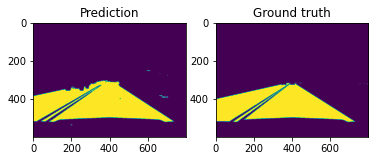

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(my_preds.reshape(600, 800))
ax[0].set_title('Prediction')

ax[1].imshow(test_masks[1].reshape(600, 800))
ax[1].set_title('Ground truth')

# evaluate

In [ ]:
%config InlineBackend.figure_format = "svg"

In [22]:
train_loss, train_accuracy = model.evaluate(train_images, train_masks, batch_size = 32)
validation_loss, validation_accuracy = model.evaluate(val_images, val_masks, batch_size = 32)
test_loss, test_accuracy = model.evaluate(test_images, batch_size = 32)

4/4 [==============================] - 6s 31ms/step - loss: 0.0000e+00 - mean_io_u: 0.0000e+00


In [70]:
test_loss, test_accuracy = model.evaluate(test_images,test_masks, batch_size = 32)

4/4 [==============================] - 33s 5s/step - loss: 0.0104 - mean_io_u: 0.4390


In [111]:
NUMBER += 1
my_preds = model.predict(np.expand_dims(test_images[NUMBER], 0))
my_preds = my_preds.flatten()
my_preds = np.array([1 if i >= 0.5 else 0 for i in my_preds])

Text(0.5, 1.0, 'Ground truth')

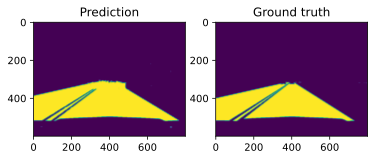

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(my_preds.reshape(600, 800))
ax[0].set_title('Prediction')

ax[1].imshow(test_masks[1].reshape(600, 800))
ax[1].set_title('Ground truth')

Text(0.5, 1.0, 'Segmentation2')

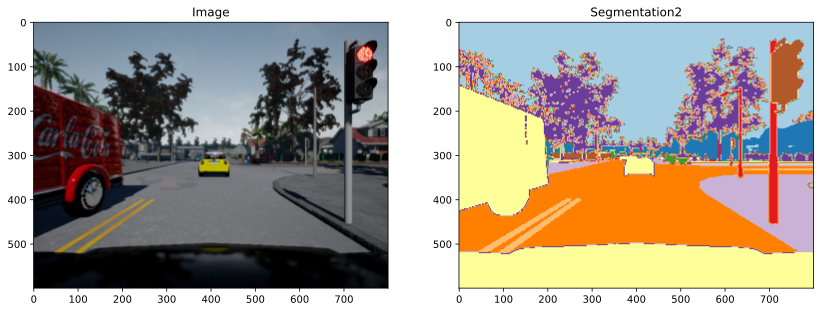

In [131]:
N = 755
img = imageio.imread(image_list[N])
mask = imageio.imread(mask_list[N])
mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(img.shape[0], img.shape[1])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))

arr[0].imshow(img)
arr[0].set_title('Image')


arr[1].imshow(mask, cmap='Paired')
arr[1].set_title('Segmentation2')